In [47]:
import pandas as pd
# import numpy as np
# import pandas as pd
import seaborn as sns
import geopandas as gpd
# import scipy.stats as stats
# import matplotlib.pyplot as plt
from src import *

In [48]:
# def create_composite_feature(dataframe, feature_list, new_feature_name, drop_features=False):
#     """
#     Create a composite feature from a list of features.
#     
#     Parameters
#     ----------
#     dataframe : pandas.DataFrame
#         The dataframe containing the features.
#     feature_list : list
#         The list of features to combine.
#     new_feature_name : str
#         The name of the new feature.
#     drop_features : bool, default False
#         Whether to drop the features used to create the new feature.
#         
#     Returns
#     -------
#     dataframe : pandas.DataFrame
#         The dataframe with the new feature added.
#     """    
#     dataframe[new_feature_name] = dataframe[feature_list].mean(axis=1)
#     if drop_features:
#         dataframe.drop(columns=feature_list, inplace=True)
#     return dataframe
# 
# 
# def create_change_features(dataframe, drop_before_after=False):
#     """
#     Create change features from before and after features.
#     
#     Parameters
#     ----------
#     dataframe : pandas.DataFrame
#         The dataframe containing the features.
#     drop_before_after : bool, default False
#         Whether to drop the before and after features.
#         
#     Returns
#     -------
#     dataframe : pandas.DataFrame
#         The dataframe with the change features added.
#         
#     Notes
#     -----
#     The change features are created by subtracting the before feature from the after feature.
#     
#     The change features are inserted after the after feature.
#     
#     Examples
#     --------
#     >>> import pandas as pd
#     >>> df = pd.DataFrame({'a_before': [1, 2, 3],
#                            'a_after': [4, 5, 6],
#                            'b_before': [7, 8, 9],
#                            'b_after': [10, 11, 12]})
#     >>> df = create_change_features(df)
#     """
#     dataframe = dataframe.copy()
#     
#     for col in dataframe.columns:
#         
#         if col.endswith('_before') or col.endswith('_after'):
#             base_col = col.rsplit('_', 1)[0]
#             before_col = base_col + '_before'
#             after_col = base_col + '_after'
#             
#             if before_col in dataframe.columns and after_col in dataframe.columns:
#                 change_col = base_col + '_change'
#                 dataframe[change_col] = dataframe[after_col] - dataframe[before_col]
#                 change_col_index = max(dataframe.columns.get_loc(before_col), dataframe.columns.get_loc(after_col)) + 1
#                 change_col_data = dataframe[change_col]
#                 dataframe.drop(columns=[change_col], inplace=True)
#                 dataframe.insert(change_col_index, change_col, change_col_data)
#                 
#                 if drop_before_after:
#                     dataframe.drop(columns=[before_col, after_col], inplace=True)
#                     
#     return dataframe
# 
# 
# # def create_intervention_features(dataframe):
# #     dataframe = dataframe.copy()
# # 
# #     for col in dataframe.columns:
# # 
# #         if col.startswith('trained') or col.startswith('adopted'):
# #             intervention_col = col.split('_', 1)[1]
# #             trained_col = 'trained_' + intervention_col
# #             adopted_col = 'adopted_' + intervention_col
# #             
# #             if trained_col in dataframe.columns and adopted_col in dataframe.columns:
# #                 # 

Tomato
Mango
Green gram
Indigenous chicken
survey_df


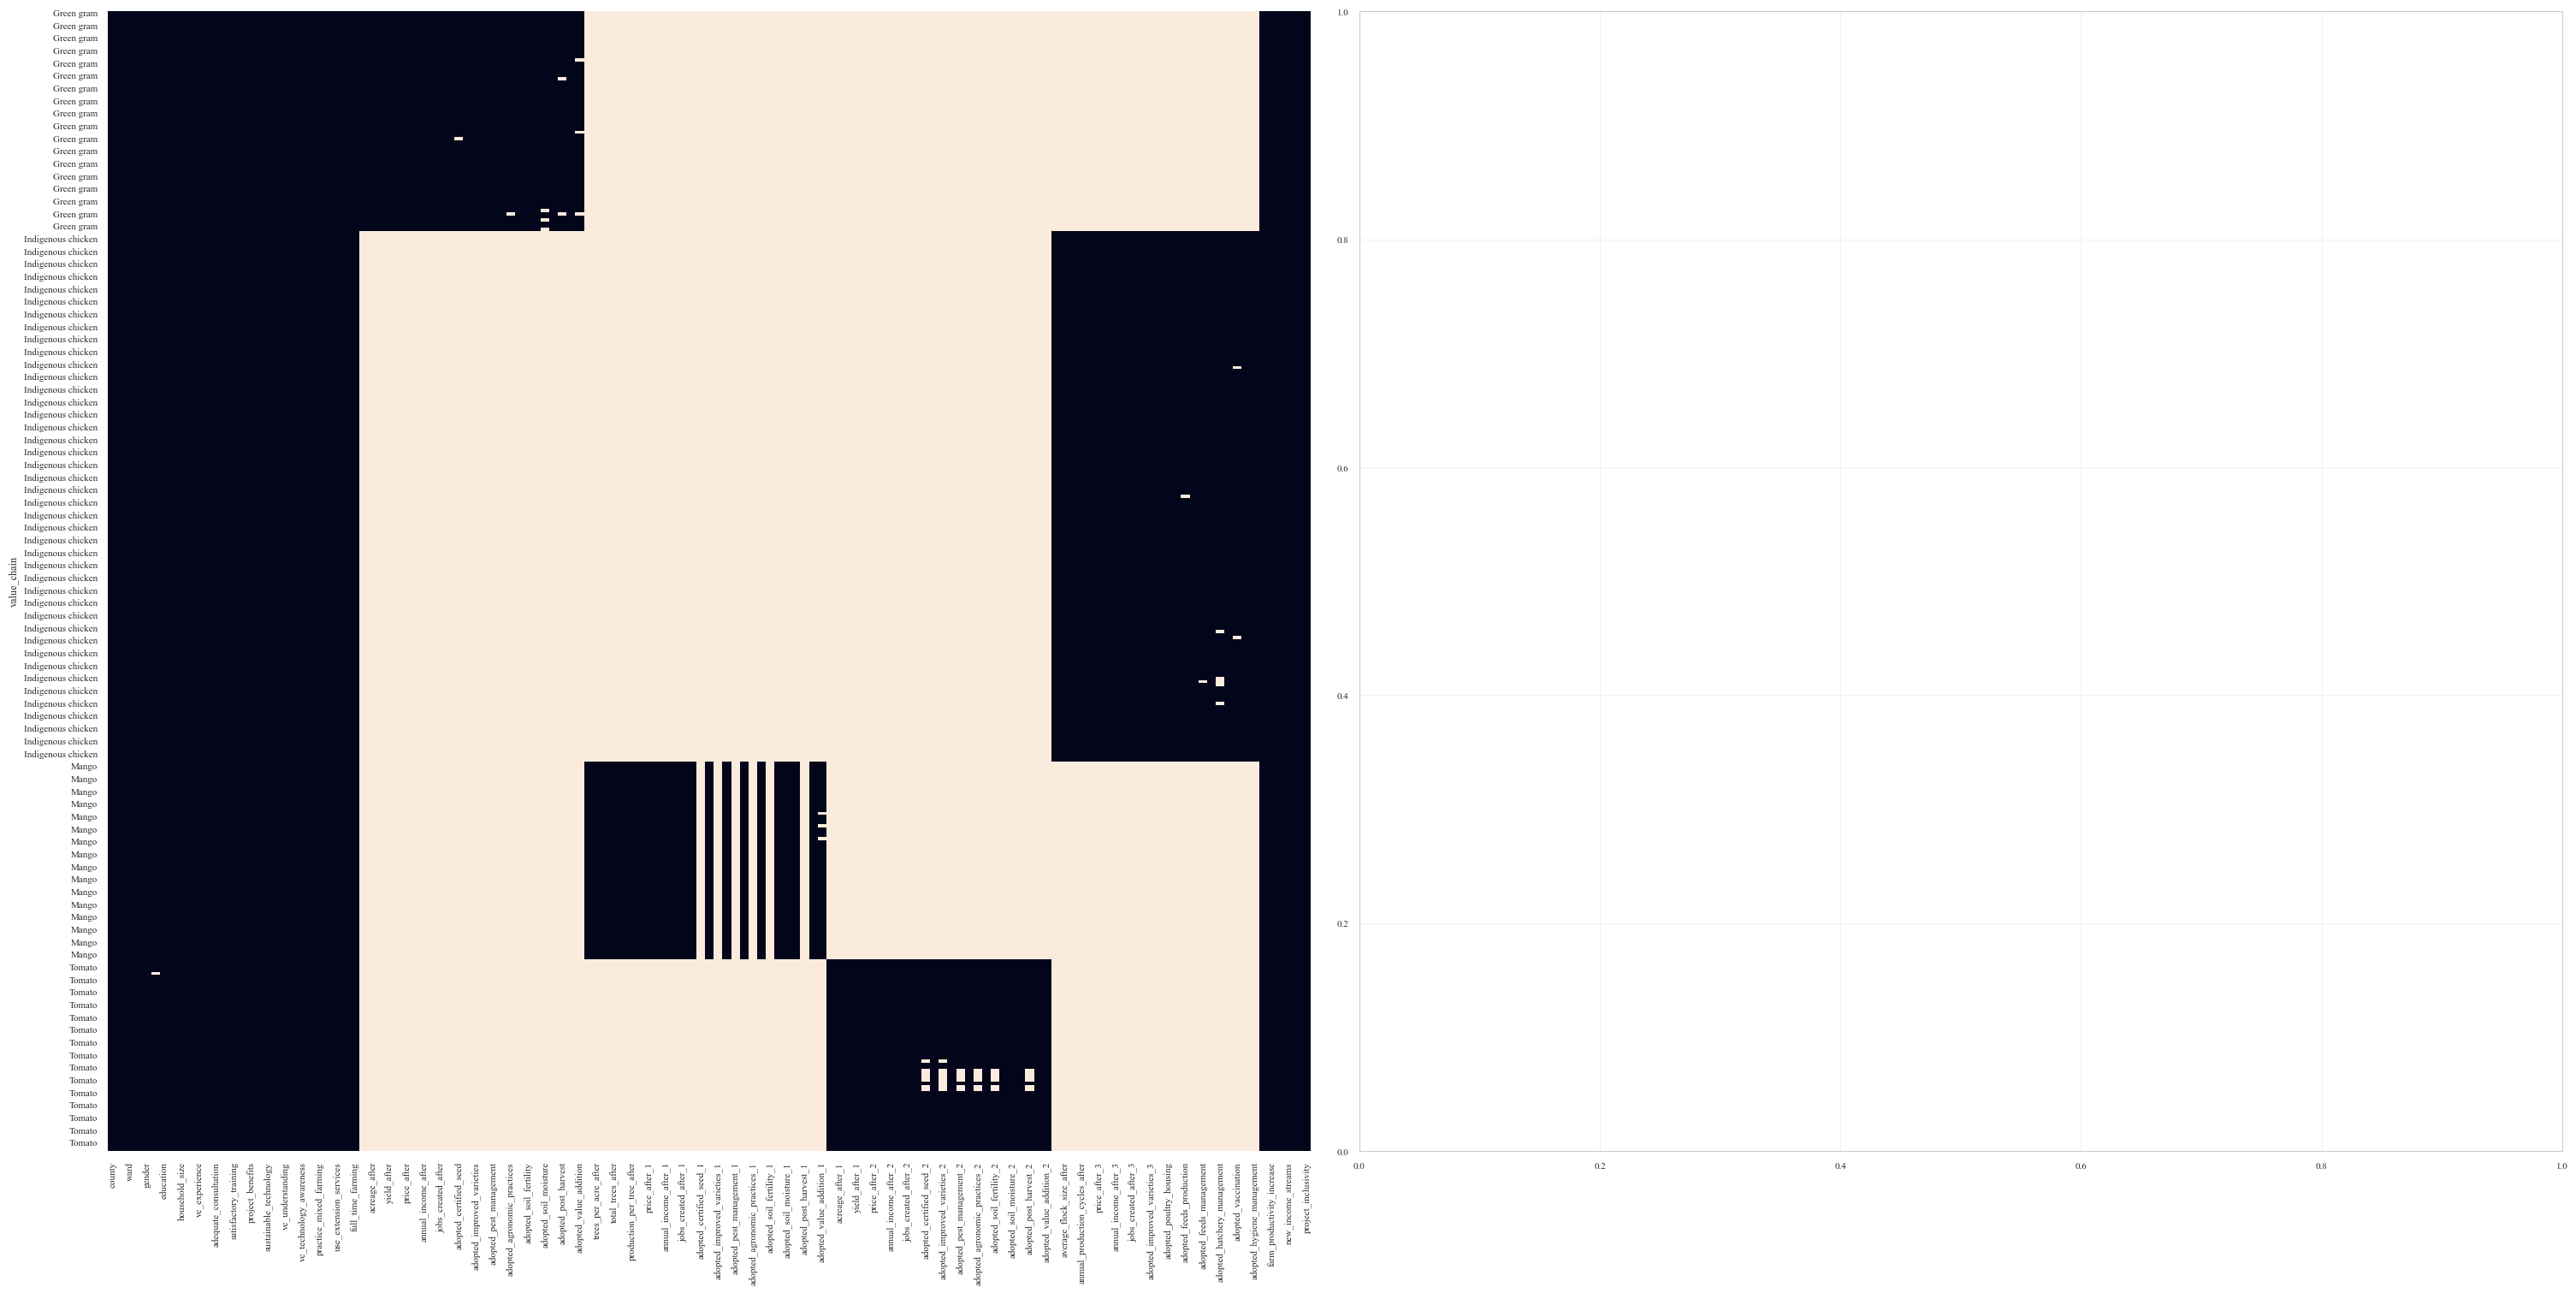

In [49]:
survey = pd.read_excel('../data/raw/NARIG_Survey.xlsx', usecols='A:EG')
column_names = pd.read_json('../data/processed/json/column_names.json', typ='series')

kenya = gpd.read_file('../data/processed/geojson/kenya.geojson')
counties = gpd.read_file('../data/processed/geojson/kenya_counties.geojson')
sub_counties = gpd.read_file('../data/processed/geojson/kenya_sub_counties.geojson')
wards = gpd.read_file('../data/processed/geojson/kenya_wards.geojson')
narig_wards = gpd.read_file('../data/processed/geojson/narig_wards.geojson')
kenya.crs = counties.crs = sub_counties.crs = wards.crs = narig_wards.crs = 'EPSG:4326'
makueni_county = counties[counties['county'] == 'Makueni']
makueni_sub_counties = sub_counties[sub_counties['county'] == 'Makueni']
makueni_wards = wards[wards['county'] == 'Makueni']

survey.rename(columns=column_names, inplace=True)

replace_map = {'Diasgree': 'Disagree',
               'Kako': 'Waia/Kako',
               'Mtito': 'Mtito Andei'}

ordinal_map = {'Strongly Agree': 5,
               'Agree': 4,
               'Neutral': 3,
               'Disagree': 2,
               'Strongly Disagree': 1}

reverse_map = {v: k for k, v in ordinal_map.items()}

survey.replace(replace_map, inplace=True)
# survey.replace(ordinal_map, inplace=True)

survey = makueni_wards.merge(survey, on='ward', how='right')

survey['age'] = survey['age'].replace(0, np.nan)
survey['gender'] = survey['gender'].str.split().str[-1]

orig_col_order = list(survey.columns)

fig, ax = plt.subplots(1, 2, figsize=(30, 15))
sns.heatmap(survey.set_index('value_chain').sort_index().isnull(), cbar=False, ax=ax[0])

demographic_cols = survey.columns[:12].tolist()
attitude_cols = survey.columns[12:20].tolist()
knowledge_cols = survey.columns[20:25].tolist()
practice_cols = survey.columns[25:30].tolist()
# vc_performance_cols = survey.columns[30:-6].tolist()
performance_cols = survey.columns[-6:].tolist()

value_chains = list(survey['value_chain'].unique())

narig_dfs = {vc: survey[survey['value_chain'] == vc].dropna(axis=1, how='all') for vc in value_chains}

for k, v in narig_dfs.items():
    v.columns = v.columns.str.replace('_\d', '', regex=True)
    v.dropna(axis=0, inplace=True)
    # v = create_composite_feature(v, attitude_cols, 'farmer_attitudes')
    # v = create_composite_feature(v, knowledge_cols, 'farmer_knowledge')
    # v = create_composite_feature(v, practice_cols, 'farmer_practices')
    # v = create_composite_feature(v, performance_cols, 'project_performance')
    # v = engineer_change_features(v)

narig_dfs['survey_df'] = pd.concat(narig_dfs.values(), ignore_index=True)
narig_dfs['survey_df'] = narig_dfs['survey_df'][[col for col in orig_col_order if col in narig_dfs['survey_df'].columns]]

# narig_dfs['survey_df'].replace(reverse_map, inplace=True)
# numeric_cols = narig_dfs['survey_df'].select_dtypes('number').columns.tolist()
# narig_dfs['survey_df'].replace(ordinal_map, inplace=True)

# narig_dfs['survey_df'] = create_change_features(narig_dfs['survey_df'], drop_before_after=False)
# narig_dfs['survey_df'] = create_composite_feature(narig_dfs['survey_df'], attitude_cols, 'farmer_attitudes', drop_features=False)
# narig_dfs['survey_df'] = create_composite_feature(narig_dfs['survey_df'], knowledge_cols, 'farmer_knowledge', drop_features=False)
# narig_dfs['survey_df'] = create_composite_feature(narig_dfs['survey_df'], practice_cols, 'farmer_practices', drop_features=False)
# narig_dfs['survey_df'] = create_composite_feature(narig_dfs['survey_df'], performance_cols, 'project_performance', drop_features=False)

for k, v in narig_dfs.items():
    for col in v.select_dtypes('object').columns:
        v[col] = v[col].astype('category')
    for col in v.select_dtypes('float').columns:
        if v[col].apply(float.is_integer).all():
            v[col] = v[col].astype(int)
    print(k)

# sns.heatmap(narig_dfs['survey_df'].set_index('value_chain').sort_index().isnull(), cbar=False, ax=ax[1])
# plt.show()

In [50]:
narig_dfs['survey_df']

,county,sub_county,ward,geometry,gender,age,education,monthly_income,household_size,family_head,...,trained_vaccination,adopted_vaccination,trained_hygiene_management,adopted_hygiene_management,enterprise_profitability_increase,farm_productivity_increase,timely_implementation,new_income_streams,job_creation_increase,project_inclusivity
0,Makueni,Mbooni,Tulimani,"POLYGON ((37.38407 -1.52204, 37.38428 -1.52226...",Male,64,Secondary,30000,3,Yes,...,NaN,NaN,NaN,NaN,Strongly Agree,Strongly Agree,Agree,Strongly Agree,Strongly Agree,Strongly Agree
1,Makueni,Mbooni,Tulimani,"POLYGON ((37.38407 -1.52204, 37.38428 -1.52226...",Male,67,Secondary,20000,4,Yes,...,NaN,NaN,NaN,NaN,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree
2,Makueni,Mbooni,Tulimani,"POLYGON ((37.38407 -1.52204, 37.38428 -1.52226...",Female,33,Primary,5000,3,No,...,NaN,NaN,NaN,NaN,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree
3,Makueni,Mbooni,Tulimani,"POLYGON ((37.38407 -1.52204, 37.38428 -1.52226...",Female,73,Primary,800,6+,No,...,NaN,NaN,NaN,NaN,Strongly Agree,Strongly Agree,Agree,Strongly Agree,Strongly Agree,Strongly Agree
4,Makueni,Mbooni,Tulimani,"POLYGON ((37.38407 -1.52204, 37.38428 -1.52226...",Male,71,Secondary,10000,5,Yes,...,NaN,NaN,NaN,NaN,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,Makueni,Kibwezi East,Mtito Andei,"POLYGON ((38.23390 -2.53316, 38.23548 -2.53385...",Female,85,Primary,16000,6+,No,...,Yes,Yes,Yes,Yes,Agree,Agree,Agree,Agree,Agree,Agree
331,Makueni,Kibwezi East,Mtito Andei,"POLYGON ((38.23390 -2.53316, 38.23548 -2.53385...",Female,54,Primary,14000,6+,Yes,...,Yes,Yes,Yes,Yes,Agree,Agree,Agree,Agree,Agree,Agree
332,Makueni,Kibwezi East,Mtito Andei,"POLYGON ((38.23390 -2.53316, 38.23548 -2.53385...",Female,60,Primary,16000,6+,Yes,...,Yes,Yes,Yes,Yes,Agree,Agree,Agree,Agree,Agree,Agree
333,Makueni,Kibwezi East,Mtito Andei,"POLYGON ((38.23390 -2.53316, 38.23548 -2.53385...",Female,62,Primary,4500,5,No,...,Yes,Yes,Yes,Yes,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree


,Ward,Sample,Returned,Percentage
0,Mtito Andei,119,122,102.52%
1,Thange,113,77,68.14%
2,Waia/Kako,99,77,77.78%
3,Tulimani,63,59,93.65%
4,Total,394,335,85.03%


,Ward,Type,Count
0,Mtito Andei,Sample,119
1,Thange,Sample,113
2,Waia/Kako,Sample,99
3,Tulimani,Sample,63
4,Mtito Andei,Returned,122
5,Thange,Returned,77
6,Waia/Kako,Returned,77
7,Tulimani,Returned,59


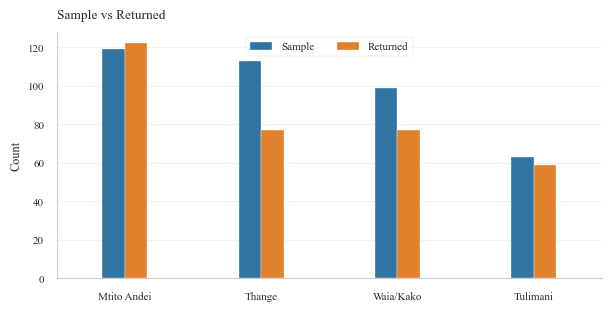

In [51]:
 # Value count ward
ward_counts = pd.DataFrame({'Ward': ['Mtito Andei', 'Thange', 'Waia/Kako', 'Tulimani'],
                            'Sample': [119, 113, 99, 63]})
ward_counts['Returned'] = narig_dfs['survey_df'].ward.value_counts().values
ward_counts.set_index('Ward', inplace=True)
ward_counts.loc['Total'] = ward_counts.sum()

ward_counts['Percentage'] = ward_counts['Returned'] / ward_counts['Sample'] * 100
ward_counts['Percentage'] = ward_counts['Percentage'].round(2)
ward_counts['Percentage'] = ward_counts['Percentage'].astype(str) + '%'
# Add total row

ward_counts.reset_index(inplace=True)
display(ward_counts)

# Melt the dataframe
ward_counts_melted = pd.melt(ward_counts.drop(4, axis=0), id_vars='Ward', value_vars=['Sample', 'Returned'], var_name='Type', value_name='Count')
display(ward_counts_melted)

# Bar chart comparing Sample vs Returned (staggered)
fig, ax = plt.subplots(figsize=(6, 3))
# sns.barplot(data=ward_counts_melted, x='Ward', y='Count', hue='Type', palette=['gray', 'navy'], ax=ax)
sns.barplot(data=ward_counts_melted, x='Ward', y='Count', hue='Type', width=0.33, ax=ax)
ax.set_title('Sample vs Returned', y=1.02, loc='left')
ax.set_xlabel('')
ax.set_ylabel('Count')
ax.legend(loc='upper center', ncol=2)
sns.despine()
plt.show()

,count,mean,std,min,25%,50%,75%,max
age,335.0,52.244776,13.656602,22.0,42.0,53.0,63.0,85.0


C:\Users\Admin\AppData\Local\Temp\ipykernel_9252\2450706655.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1,1].set_xticklabels(ax[1,1].get_xticklabels(), rotation=90)


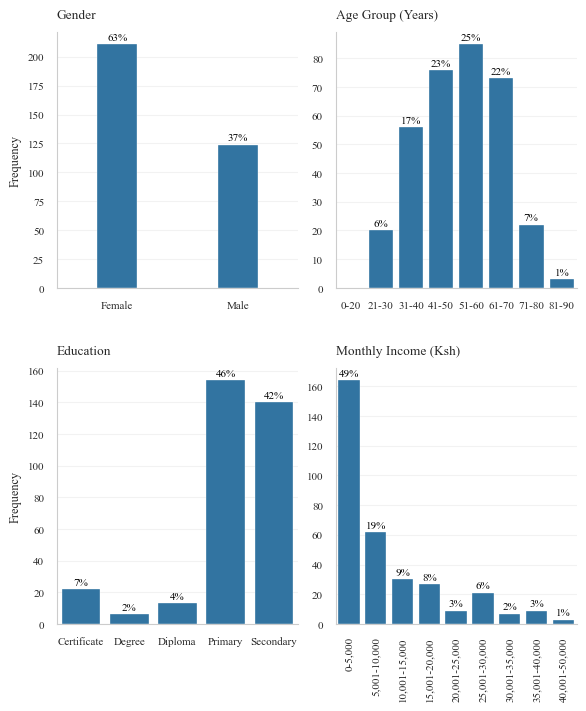

C:\Users\Admin\AppData\Local\Temp\ipykernel_9252\2450706655.py:76: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1,0].set_xticklabels(ax[1,0].get_xticklabels(), rotation=90)


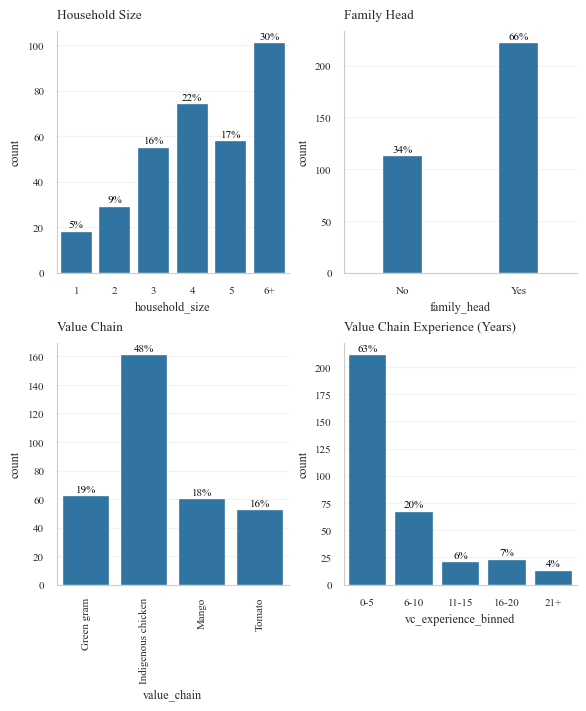

In [52]:
display(narig_dfs['survey_df'][['age']].describe().T)

# Create a new age column with the age groups
narig_dfs['survey_df']['age_group'] = pd.cut(narig_dfs['survey_df']['age'], bins=[0, 20, 30, 40, 50, 60, 70, 80, 90], labels=['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90'])

# Create a new income column with the income groups
narig_dfs['survey_df']['income_group'] = pd.cut(narig_dfs['survey_df']['monthly_income'], bins=[0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 50000], labels=['0-5,000', '5,001-10,000', '10,001-15,000', '15,001-20,000', '20,001-25,000', '25,001-30,000', '30,001-35,000', '35,001-40,000', '40,001-50,000'])

# Create a new vc_experience column with the vc_experience groups
narig_dfs['survey_df']['vc_experience_binned'] = pd.cut(narig_dfs['survey_df']['vc_experience'], bins=[0, 5, 10, 15, 20, np.inf], labels=['0-5', '6-10', '11-15', '16-20', '21+'])

# Plot age groups
fig, ax = plt.subplots(2, 2, figsize=(5.75, 7), gridspec_kw={'hspace': 0.1})

sns.countplot(data=narig_dfs['survey_df'], x='gender', width=0.33, ax=ax[0,0])
sns.countplot(data=narig_dfs['survey_df'], x='age_group', ax=ax[0,1])
sns.countplot(data=narig_dfs['survey_df'], x='education', ax=ax[1,0])
sns.countplot(data=narig_dfs['survey_df'], x='income_group', ax=ax[1,1])

# Annotate the plots with percentages
for i in range(2):
    for j in range(2):
        for p in ax[i,j].patches:
            ax[i,j].annotate(f"{p.get_height() / narig_dfs['survey_df'].shape[0] * 100:.0f}%", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')
            
ax[0,0].set_title('Gender', y=1.02, loc='left')
ax[0,1].set_title('Age Group (Years)', y=1.02, loc='left')
ax[1,0].set_title('Education', y=1.02, loc='left')
ax[1,1].set_title('Monthly Income (Ksh)', y=1.02, loc='left')

ax[0,0].set_xlabel('')
ax[0,1].set_xlabel('')
ax[1,0].set_xlabel('')
ax[1,1].set_xlabel('')
ax[0,0].set_ylabel('Frequency')
ax[0,1].set_ylabel('')
ax[1,0].set_ylabel('Frequency')
ax[1,1].set_ylabel('')

# ax[0].set_title('Gender', y=1.02, loc='left')
# ax[1].set_title('Age Group', y=1.02, loc='left')
# ax[2].set_title('Education', y=1.02, loc='left')
# 
# ax[0].set_xlabel('')
# ax[1].set_xlabel('')
# ax[2].set_xlabel('')
# 
# ax[0].set_ylabel('Count')
# ax[1].set_ylabel('')
# ax[2].set_ylabel('')

ax[1,1].set_xticklabels(ax[1,1].get_xticklabels(), rotation=90)

sns.despine()
plt.show()

fig, ax = plt.subplots(2, 2, figsize=(5.75, 7))

sns.countplot(data=narig_dfs['survey_df'], x='household_size', ax=ax[0,0])
sns.countplot(data=narig_dfs['survey_df'], x='family_head', width=0.33, ax=ax[0,1])
sns.countplot(data=narig_dfs['survey_df'], x='value_chain', ax=ax[1,0])
sns.countplot(data=narig_dfs['survey_df'], x='vc_experience_binned', ax=ax[1,1])

# Annotate the plots with percentages
for i in range(2):
    for j in range(2):
        for p in ax[i,j].patches:
            ax[i,j].annotate(f"{p.get_height() / narig_dfs['survey_df'].shape[0] * 100:.0f}%", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')
            
ax[0,0].set_title('Household Size', y=1.02, loc='left')
ax[0,1].set_title('Family Head', y=1.02, loc='left')
ax[1,0].set_title('Value Chain', y=1.02, loc='left')
ax[1,1].set_title('Value Chain Experience (Years)', y=1.02, loc='left')

            
ax[1,0].set_xticklabels(ax[1,0].get_xticklabels(), rotation=90)

sns.despine()
plt.show()

,index,project_understanding,vc_understanding,vc_agriculture_practices_awareness,vc_technology_awareness,vc_product_marketing_understanding
0,0,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Agree
1,1,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree
2,2,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree
3,3,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree
4,4,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree
...,...,...,...,...,...,...
330,330,Strongly Agree,Agree,Agree,Agree,Agree
331,331,Strongly Agree,Agree,Agree,Agree,Agree
332,332,Agree,Agree,Agree,Agree,Agree
333,333,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree


,index,Question,Response
0,0,project_understanding,Strongly Agree
1,1,project_understanding,Strongly Agree
2,2,project_understanding,Strongly Agree
3,3,project_understanding,Strongly Agree
4,4,project_understanding,Strongly Agree
...,...,...,...
1670,330,vc_product_marketing_understanding,Agree
1671,331,vc_product_marketing_understanding,Agree
1672,332,vc_product_marketing_understanding,Agree
1673,333,vc_product_marketing_understanding,Strongly Agree


<Axes: xlabel='count', ylabel='Question'>

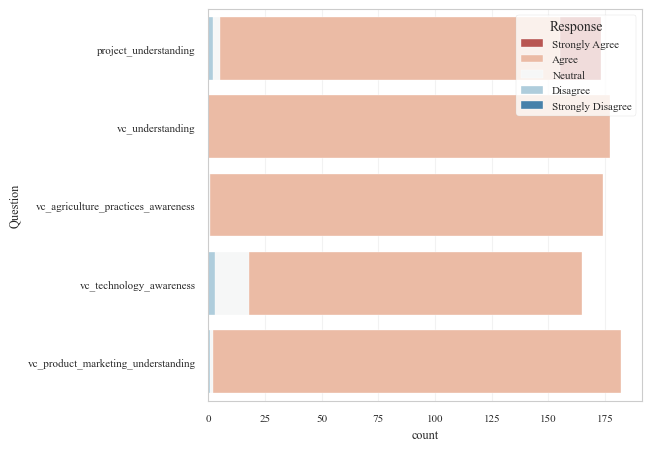

In [54]:
farmer_attitudes = narig_dfs['survey_df'][attitude_cols].reset_index()
farmer_knowledge = narig_dfs['survey_df'][knowledge_cols].reset_index()
farmer_practices = narig_dfs['survey_df'][practice_cols].reset_index()
display(farmer_knowledge)

# Melt the data to have 'Question' and 'Response' columns
farmer_knowledge_melted = pd.melt(farmer_knowledge, id_vars='index', var_name='Question', value_name='Response')

display(farmer_knowledge_melted)

palette = sns.color_palette('RdBu', 5)
sns.countplot(data=farmer_knowledge_melted, y='Question', hue='Response',
              hue_order=['Strongly Agree', 'Agree', 'Neutral', 'Disagree', 'Strongly Disagree'],
              palette=palette, fill=True, dodge=False, legend=True, stat='count')


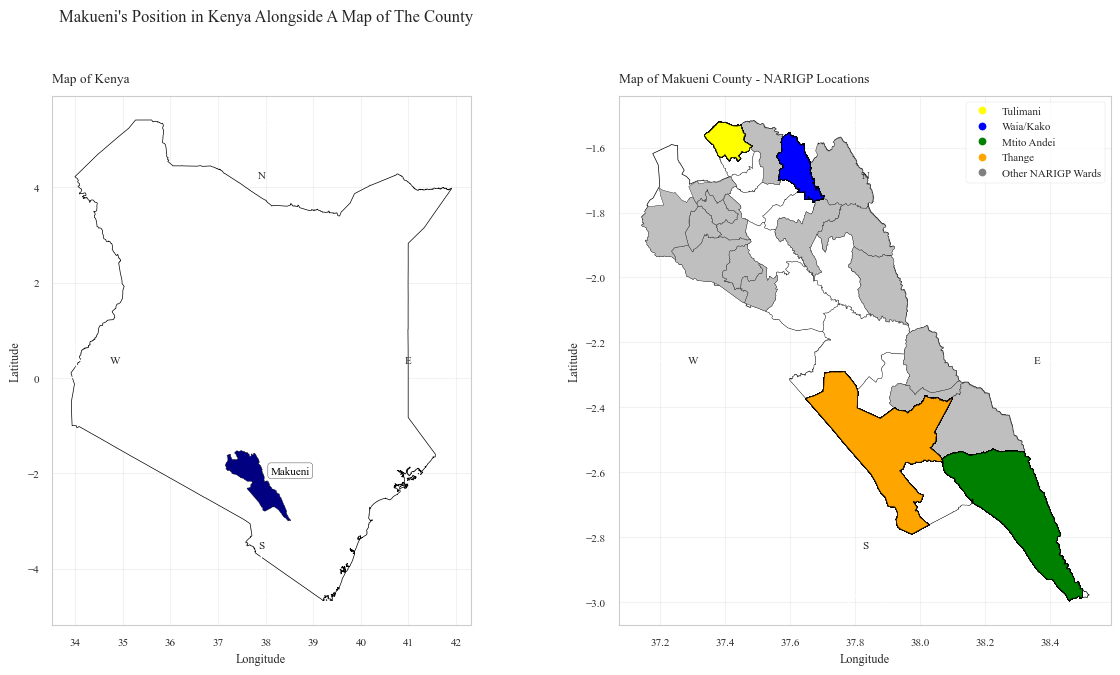

In [55]:
# Create a single figure
fig, ax = plt.subplots(1,2, figsize=(12, 6))

# Plot Kenya
kenya.plot(ax=ax[0], color='white', edgecolor='black', linewidth=0.5)
ax[0].set_title('Map of Kenya', y=1.01, loc='left')  # Set title alignment to left

# Plot Makueni County
makueni_county.plot(ax=ax[0], color='navy', edgecolor='black')

# Annotate Makueni County
centroid = makueni_county.iloc[0].geometry.centroid
annotation = ax[0].annotate('Makueni', xy=(centroid.x, centroid.y),
               xytext=(25, 5), textcoords="offset points", color='black', fontsize=8, ha='center',
            bbox=dict(boxstyle='round', fc='white', ec='black', pad=0.25))

# Plot Makueni County separately
makueni_county.plot(ax=ax[1], color='white', edgecolor='black', linewidth=0.5)
ax[1].set_title('Map of Makueni County - NARIGP Locations', y=1.01, loc='left')  # Set title alignment to left

# Plot Makueni wards
makueni_wards.plot(ax=ax[1], color='white', edgecolor='black', linewidth=0.25)
narig_wards.plot(ax=ax[1], color='gray', edgecolor='black', linewidth = 0.1, alpha=0.5)

# Annotate Makueni County in the second plot
# annotation2 = ax[1].annotate('Makueni', xy=(makueni_county.geometry.centroid.x, makueni_county.geometry.centroid.y),
#xytext=(30, 0), textcoords="offset points", color='black', fontsize=8, ha='center')

# Plot survey points
# Set colors for each ward
colors = {'Tulimani': 'yellow',
          'Waia/Kako': 'blue',
          'Mtito Andei': 'green',
          'Thange': 'orange'}

survey.plot(ax=ax[1], edgecolor='black', linewidth=0.5, color=survey['ward'].map(colors), legend=True)

# Add gray to the legend indicating NARIG locations
handles, labels = ax[1].get_legend_handles_labels()
handles.append(plt.Line2D([], [], color='yellow', marker='o', linestyle='None'))
labels.append('Tulimani')
handles.append(plt.Line2D([], [], color='blue', marker='o', linestyle='None'))
labels.append('Waia/Kako')
handles.append(plt.Line2D([], [], color='green', marker='o', linestyle='None'))
labels.append('Mtito Andei')
handles.append(plt.Line2D([], [], color='orange', marker='o', linestyle='None'))
labels.append('Thange')
handles.append(plt.Line2D([], [], color='gray', marker='o', linestyle='None'))
labels.append('Other NARIGP Wards')
ax[1].legend(handles=handles, labels=labels)

# Add titles and labels
fig.suptitle("Makueni's Position in Kenya Alongside A Map of The County", x=0.08, y=1.1, ha='left')  # Set title alignment to left
ax[0].set_xlabel('Longitude')
ax[0].set_ylabel('Latitude')
ax[1].set_xlabel('Longitude')
ax[1].set_ylabel('Latitude')

# Add scale bar
#scalebar = gpd.GeoSeries(LineString([(0.9, 0.1), (1.1, 0.1)]), crs=kenya.crs)
#scalebar.plot(ax=ax[0], color='black', linewidth=2)

# Move legend lower
# ax[1].get_legend().set_bbox_to_anchor((0.525, 0.33))
# # ax[1].get_legend().set_title('Ward')
# # Reduce the size of the legend
# ax[1].get_legend().get_title().set_fontsize(8)
# for t in ax[1].get_legend().texts:
#     t.set_fontsize(8)

# Remove axes
# ax[0].set_axis_off()
# ax[1].set_axis_off()
# Add a compass rose
ax[0].annotate('N', xy=(0.5, 0.95), xytext=(0.5, 0.85), xycoords='axes fraction', ha='center', va='center', fontsize=8, arrowprops=dict(arrowstyle='-[, widthB=1.5, lengthB=0.75', lw=1.0))
ax[0].annotate('S', xy=(0.5, 0.05), xytext=(0.5, 0.15), xycoords='axes fraction', ha='center', va='center', fontsize=8, arrowprops=dict(arrowstyle='-[, widthB=1.5, lengthB=0.75', lw=1.0))
ax[0].annotate('E', xy=(0.95, 0.5), xytext=(0.85, 0.5), xycoords='axes fraction', ha='center', va='center', fontsize=8, arrowprops=dict(arrowstyle='-[, widthB=1.5, lengthB=0.75', lw=1.0))
ax[0].annotate('W', xy=(0.05, 0.5), xytext=(0.15, 0.5), xycoords='axes fraction', ha='center', va='center', fontsize=8, arrowprops=dict(arrowstyle='-[, widthB=1.5, lengthB=0.75', lw=1.0))

ax[1].annotate('N', xy=(0.5, 0.95), xytext=(0.5, 0.85), xycoords='axes fraction', ha='center', va='center', fontsize=8, arrowprops=dict(arrowstyle='-[, widthB=1.5, lengthB=0.75', lw=1.0))
ax[1].annotate('S', xy=(0.5, 0.05), xytext=(0.5, 0.15), xycoords='axes fraction', ha='center', va='center', fontsize=8, arrowprops=dict(arrowstyle='-[, widthB=1.5, lengthB=0.75', lw=1.0))
ax[1].annotate('E', xy=(0.95, 0.5), xytext=(0.85, 0.5), xycoords='axes fraction', ha='center', va='center', fontsize=8, arrowprops=dict(arrowstyle='-[, widthB=1.5, lengthB=0.75', lw=1.0))
ax[1].annotate('W', xy=(0.05, 0.5), xytext=(0.15, 0.5), xycoords='axes fraction', ha='center', va='center', fontsize=8, arrowprops=dict(arrowstyle='-[, widthB=1.5, lengthB=0.75', lw=1.0))
# Add a border to the figure
# fig.patch.set_edgecolor('black')

plt.show()

In [56]:
print(handles, labels)

[<matplotlib.lines.Line2D object at 0x00000198C9F41B90>, <matplotlib.lines.Line2D object at 0x00000198CA314E90>, <matplotlib.lines.Line2D object at 0x00000198CA222710>, <matplotlib.lines.Line2D object at 0x00000198CA22A590>, <matplotlib.lines.Line2D object at 0x00000198D0F5B3D0>] ['Tulimani', 'Waia/Kako', 'Mtito Andei', 'Thange', 'Other NARIGP Wards']


In [57]:
narig_dfs['survey_df'][numeric_cols].hist(figsize=(9,9))
plt.show()


def filter_outliers(dataframe: pd.DataFrame, columns: list):
    
    for col in columns:
        
        mean = dataframe[col].mean()
        std = dataframe[col].std()
        limit = std * 3

        lower, upper = (mean - limit), (mean + limit)

        dataframe = dataframe[(dataframe[col] > lower) &
                                   (dataframe[col] < upper)]
        
        return dataframe
        
df_outliers = filter_outliers(narig_dfs['survey_df'], numeric_cols)

df_outliers[numeric_cols].hist(figsize=(9,9))
plt.show()


# survey.hist('vc_experience')
# plt.show()

# mean_vce = survey.vc_experience.mean()
# print(mean_vce)
# std_vce = survey.vc_experience.std()
# print(std_vce)
# limit = std_vce * 3
# print(limit)
# lower, upper = mean_vce - limit, mean_vce + limit
# print(lower, ',', upper)

# survey = survey[survey['vc_experience'] < upper]


# # survey['vc_experience'] = survey.vc_experience ** 1/3

# survey.hist('vc_experience')
# plt.show()

# mean_vce = survey.vc_experience.mean()
# print(mean_vce)
# std_vce = survey.vc_experience.std()
# print(std_vce)
# limit = std_vce * 3
# print(limit)
# lower, upper = mean_vce - limit, mean_vce + limit
# print(lower, ',', upper)

# survey = survey[survey['vc_experience'] > upper]

# survey.hist('vc_experience')
# plt.show()

NameError: name 'numeric_cols' is not defined

In [ ]:
df_outliers.describe().round(2).T.map(lambda x: int(x) if x.is_integer() else x).rename(columns={'count': 'Count', 'mean': 'Mean', 'std': 'Standard Deviation', 'min': 'Minimum', '25%': '25th Percentile', '50%': '50th Percentile', '75%': '75th Percentile', 'max': 'Maximum'})

In [ ]:
# Plot project_performance on the map
fig, ax = plt.subplots(figsize=(8, 4))

makueni_county.plot(ax=ax, color='white', edgecolor='black', linewidth=0.5)
makueni_wards.plot(ax=ax, color='white', edgecolor='black', linewidth=0.25)
cax = fig.add_axes([1, 0.2, 0.02, 0.6])  # Reduce the width of the colorbar axes
df_outliers.plot('project_performance', legend=True, ax=ax, cax=cax)  # Add cax parameter to specify the colorbar axes

# Add title and labels
ax.set_title('Project Performance Across NARIG Wards', y=1.01, loc='left')  # Set title alignment to left

# Get unique geometries from the dataframe
unique_geometries = df_outliers.drop_duplicates(subset='geometry')

# Add annotations individually
tulimani = unique_geometries[unique_geometries['ward'] == 'Tulimani']
tulimani_centroid = tulimani.iloc[0].geometry.centroid
ax.annotate('Tulimani', xy=(tulimani_centroid.x, tulimani_centroid.y),
            xytext=(-40, 10), textcoords="offset points", color='black', fontsize=7, ha='center',
            bbox=dict(boxstyle='round', fc='white', ec='black', pad=0.25),
            arrowprops=dict(arrowstyle='->', color='black'))

kako = unique_geometries[unique_geometries['ward'] == 'Waia/Kako']
kako_centroid = kako.iloc[0].geometry.centroid
ax.annotate('Waia/Kako', xy=(kako_centroid.x, kako_centroid.y),
            xytext=(30, 27.5), textcoords="offset points", color='black', fontsize=7, ha='center',
            bbox=dict(boxstyle='round', fc='white', ec='black', pad=0.25),
            arrowprops=dict(arrowstyle='->', color='black'))

mtito = unique_geometries[unique_geometries['ward'] == 'Mtito Andei']
mtito_centroid = mtito.iloc[0].geometry.centroid
ax.annotate('Mtito Andei', xy=(mtito_centroid.x, mtito_centroid.y),
            xytext=(-30, -30), textcoords="offset points", color='black', fontsize=7, ha='center',
            bbox=dict(boxstyle='round', fc='white', ec='black', pad=0.25),
            arrowprops=dict(arrowstyle='->', color='black'))

thange = unique_geometries[unique_geometries['ward'] == 'Thange']
thange_centroid = thange.iloc[0].geometry.centroid
ax.annotate('Thange', xy=(thange_centroid.x, thange_centroid.y),
            xytext=(-45, -15), textcoords="offset points", color='black', fontsize=7, ha='center',
            bbox=dict(boxstyle='round', fc='white', ec='black', pad=0.25),
            arrowprops=dict(arrowstyle='->', color='black'))

# Remove axes
ax.set_axis_off()

plt.show()

In [ ]:
# # Cuberoot
# for col in df_outliers.select_dtypes('number').columns:
#     df_outliers[col] = df_outliers[col] ** 1/3

In [ ]:
corr = df_outliers[numeric_cols + ['farmer_attitudes', 'farmer_knowledge', 'farmer_practices', 'project_performance']].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Sort the correlation matrix by project_performance (both axes)
corr = corr.sort_values(by='project_performance', ascending=False); corr = corr[corr.index]

sns.heatmap(corr, mask=mask, cmap='viridis', linewidths=0.5, cbar_kws={"shrink": 0.5}, annot=True, fmt='.2f', cbar=False, ax=ax[0])
ax[0].set_title('Correlation Matrix', y=1.01, loc='left')
sns.barplot(y=corr['project_performance'].sort_values(ascending=False).values, x=corr['project_performance'].sort_values(ascending=False).index, hue=corr['project_performance'], orient='v', palette=sns.color_palette('Blues', len(corr.columns)), width = 0.5, legend=False, ax=ax[1])
for i, v in enumerate(corr['project_performance'].sort_values(ascending=False).values):
    if v > 0:
        ax[1].text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom', fontsize=8)
    else:
        ax[1].text(i, v - 0.01, f"{v:.2f}", ha='center', va='top', fontsize=8)

ax[1].set_xlabel('')
ax[1].set_title('Correlation with Project Performance', y=1.01, loc='left')
ax[1].xaxis.set_tick_params(rotation=90)

ax[0].tick_params(axis='x', which='both', bottom=False)
ax[1].tick_params(axis='x', which='both', bottom=False)

sns.despine()

plt.show()

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(9, 3))

sns.regplot(data=df_outliers, x='farmer_attitudes', y='project_performance', ax=ax[0], scatter_kws={'alpha': 0.5}, logx=False, ci=None)
sns.regplot(data=df_outliers, x='farmer_knowledge', y='project_performance', ax=ax[1], scatter_kws={'alpha': 0.5}, logx=False, ci=None)
sns.regplot(data=df_outliers, x='farmer_practices', y='project_performance', ax=ax[2], scatter_kws={'alpha': 0.5}, logx=False, ci=None)


ax[0].set_title('Farmer Attitudes vs Project Performance', y=1.02, loc='left')
ax[1].set_title('Farmer Knowledge vs Project Performance', y=1.02, loc='left')
ax[2].set_title('Farmer Practices vs Project Performance', y=1.02, loc='left')

ax[0].set_xlabel('Farmer Attitudes')
ax[1].set_xlabel('Farmer Knowledge')
ax[2].set_xlabel('Farmer Practices')

ax[0].set_ylabel('Project Performance')
ax[1].set_ylabel('')
ax[2].set_ylabel('')

sns.despine()

plt.show()

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(9, 3))

sns.regplot(data=df_outliers, x='age', y='project_performance', ax=ax[0], scatter_kws={'alpha': 0.5}, logx=False, ci=None)
sns.regplot(data=df_outliers, x='monthly_income', y='project_performance', ax=ax[1], scatter_kws={'alpha': 0.5}, logx=False, ci=None)
sns.regplot(data=df_outliers, x='vc_experience', y='project_performance', ax=ax[2], scatter_kws={'alpha': 0.5}, logx=False, ci=None)

ax[0].set_title('Age vs Project Performance', y=1.02, loc='left')
ax[1].set_title('Monthly Income vs Project Performance', y=1.02, loc='left')
ax[2].set_title('Value Chain Experience vs Project Performance', y=1.02, loc='left')

ax[0].set_xlabel('Age')
ax[1].set_xlabel('Monthly Income')
ax[2].set_xlabel('Value Chain Experience')

ax[0].set_ylabel('Project Performance')
ax[1].set_ylabel('')
ax[2].set_ylabel('')

sns.despine()

plt.show()

In [ ]:
# Create a figure with boxplots for demographic data against project_performance
fig, ax = plt.subplots(2, 2, figsize=(9, 6), sharey=True)

sns.boxplot(data=df_outliers, x='value_chain', y='project_performance', width=0.25, ax=ax[0,0])
sns.boxplot(data=df_outliers, x='education', y='project_performance', width=0.25, ax=ax[0,1])
sns.boxplot(data=df_outliers, x='gender', y='project_performance', width=0.1, ax=ax[1,0])
sns.boxplot(data=df_outliers, x='family_head', y='project_performance', width=0.1, ax=ax[1,1])

ax[0,0].set_title('Value Chain vs Project Performance', y=1.02, loc='left')
ax[0,1].set_title('Education vs Project Performance', y=1.02, loc='left')
ax